# Project: Find the best two markets to advertise the product

In this project, we 're in data analytics team and got required to find the two best markets to promote our product is an e-learning app about programming course.

So now, what's we have is:
- Our app is mainly of __web, mobile development__, beside that is a lot of sub-categories combine (data science,...)
- Mostly our course is in __native English__ language

In order to get overview of all markets for now, we will making a survey, but since our money is limited for surveying (unitl our boss can see the result, they not likely to accepted any required of outcome for anything not sure) and have to invest for promote, we will use and exists survey for instead.

We will use survey of freeCodeCamp, by:
- They're also e-learning platform that offer course on web
- They've run a popular Medium survey (that over 400,000 follower), and their survey could be attracted new coder for any pattern programming (web, mobile, app...)

Right now, we will load this data in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load data in
survey17 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [3]:
pd.set_option('display.max_columns',200)

In [4]:
survey17.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# 1. Verify the properlity of data

Before jump in the deep, we will verify this data so we can see that is this data reference the purpose of us: __Find the coder who want to be mobile/ web dev__, by `JobRoleInterest` column (We will count how many time role of `web dev` or `mobile dev` is in this data).

In [5]:
#Check the overview 'JobRoleInter'
survey17['JobRoleInterest'].unique()

array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

In this scope of project, all those who don't answer at `JobRoleInterest` will be clear (because we don't know what's role they are like, and we couldn't have any benefit from those records like that).

In [6]:
#Remove all records missing at `JobRoleInterest`
survey17_2 = survey17[lambda x:x['JobRoleInterest'].notnull()]

Total of votes: 6992


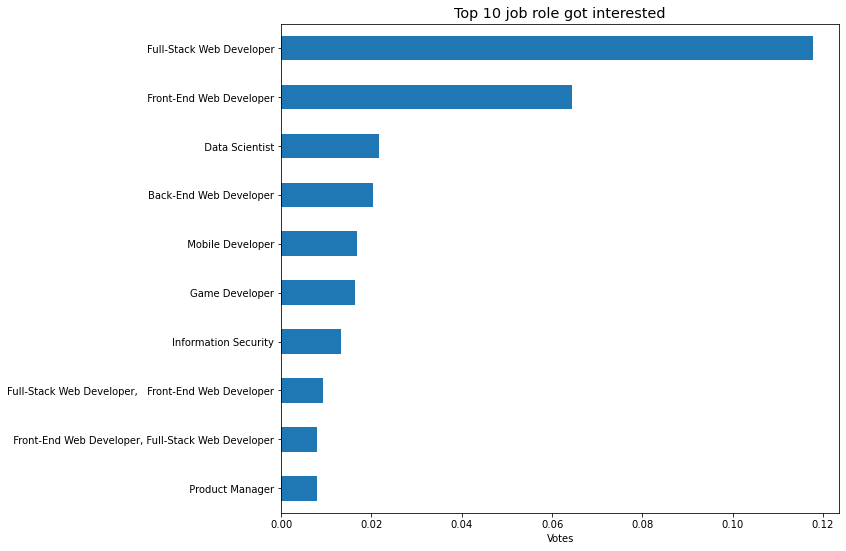

In [7]:
#Get data
role_per = survey17_2['JobRoleInterest'].value_counts(ascending=True, normalize=True).tail(10)
print('Total of votes: {}'.format(survey17_2.shape[0]))

role_per.plot(kind='barh', figsize=(10,9))
plt.xlabel('Votes')

plt.title('Top 10 job role got interested', fontsize='x-large')
plt.show()

Follow this graph, we can see that most of the desired on coder attendances is `Full-stack Web Deverloper` (with contain both of `Front-End Web Dev` and `Back-end Web Dev`), and amount of `Mobile Deverloper`

So we can sure this data will be benefit for us to analysis and find the two markets to promote.

# 2. Find the customer's locate

Before go ahead with any analysis, we'd like to simplify our tabular data, so we'll delete some field that not for our analysis

In [8]:
#Point the coluom location
col_name = ['CodeEventConferences', 'CodeEventWorkshops', 'PodcastChangeLog', 'YouTubeTheNewBoston']
col_pos = [survey17_2.columns.get_loc(i) for i in col_name]
col_pos

[8, 23, 79, 135]

In [9]:
#Drop the field:
survey17_2 = survey17_2.drop(columns=survey17_2.columns[79:-1])

In [10]:
survey17_2 = survey17_2.drop(columns=survey17_2.columns[8:24])
survey17_2.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.0,5.0,dbdc0664d1,2017-03-09 00:40:13,2017-03-09 00:37:45,2017-03-09 00:42:26,2017-03-09 00:40:18,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.0,24.0,11b0f2d8a9,2017-03-09 00:42:45,2017-03-09 00:39:44,2017-03-09 00:45:42,2017-03-09 00:42:50,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Market research,Employed for wages,NaN,30000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,120000.0,16.0,5e130f133306abd6c2f9af31467ff37c,fe5e9f175fdfbf18bcf6c85d6e042b68,40000.0,NaN,0.0,0.0,0.0,I'm already applying,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,Full-Stack Web Developer,no preference,English,married or domestic partnership,0.0,12.0,f4abfae20d,2017-03-

First, we will find where are our customer (by the barchart and stack-area). We will do it by find in `CountryLive` and then `CityPopulation`; of course; because we are interest in who keen on `web/mobile dev` so we will filter which country satisfied our standard.

In [11]:
# Filter the tabular
survey17_3 = survey17_2[lambda x: x['JobRoleInterest'].str.contains('Web|Mobile', regex=True)]
survey17_3.shape

(6034, 64)

Let's review the first indicator that we've decided one market to be the potential market: __Our customer mainly gather at there__, in other words, we want to find out where our customer likely to be there. So let's check it by regions frequecy and chart of `CityPopulation`.

Total of attendance region = 136


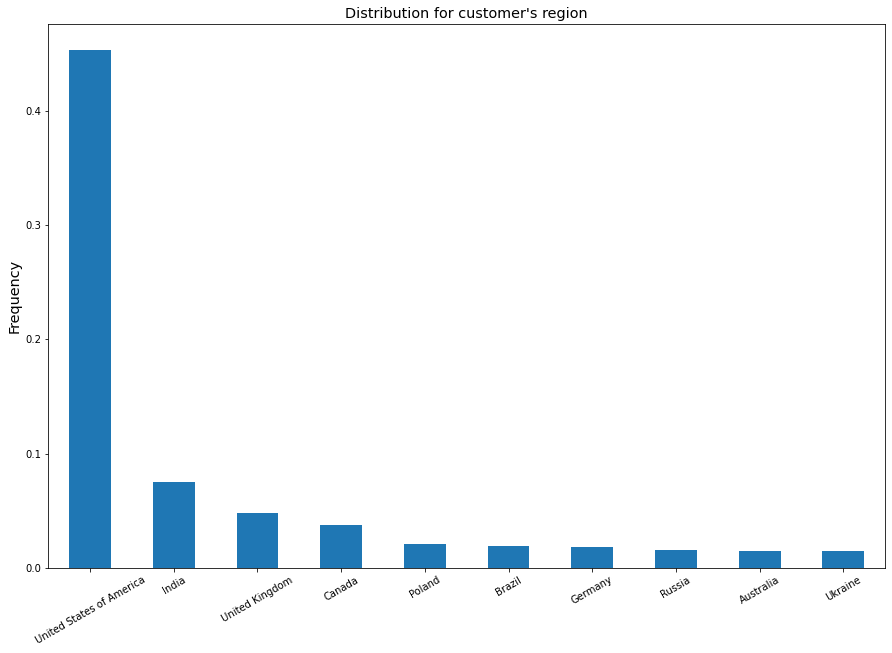

In [12]:
# Plot the barchart:
to_plot = survey17_3['CountryLive'].value_counts(normalize=True).head(10)
n_regions = survey17_3['CountryLive'].unique()
print('Total of attendance region = {}'.format(len(n_regions)))

to_plot.plot(kind='bar', figsize=(15,10))
plt.xticks(rotation=30)
plt.ylabel('Frequency', fontsize='x-large')

plt.title("Distribution for customer's region", fontsize='x-large')
plt.show()

Look at the graph, we identified the four region as four individual market that could make sense: `USA`, `India`, `UK`, `Canada`. Now we'll group these four regions and see the `CityPopulation` of it.

In [13]:
#Filter out the potential regions
reg_name = ['United States of America', 'India', 'United Kingdom', 'Canada']

survey17_3 = survey17_3[lambda x: x['CountryLive'].isin(reg_name)]
survey17_3.shape

(3622, 64)

Now we will check the population by pairs: `USA` VS `India`, `UK` vs `Canada`.

In [14]:
# Pair 1:
area_usa = survey17_3[lambda x:x['CountryLive']=='United States of America']['CityPopulation'].value_counts()
area_india = survey17_3[lambda x:x['CountryLive']=='India']['CityPopulation'].value_counts()

In [15]:
# Pair 2:
area_uk = survey17_3[lambda x:x['CountryLive']=='United Kingdom']['CityPopulation'].value_counts()
area_canada = survey17_3[lambda x:x['CountryLive']=='Canada']['CityPopulation'].value_counts()

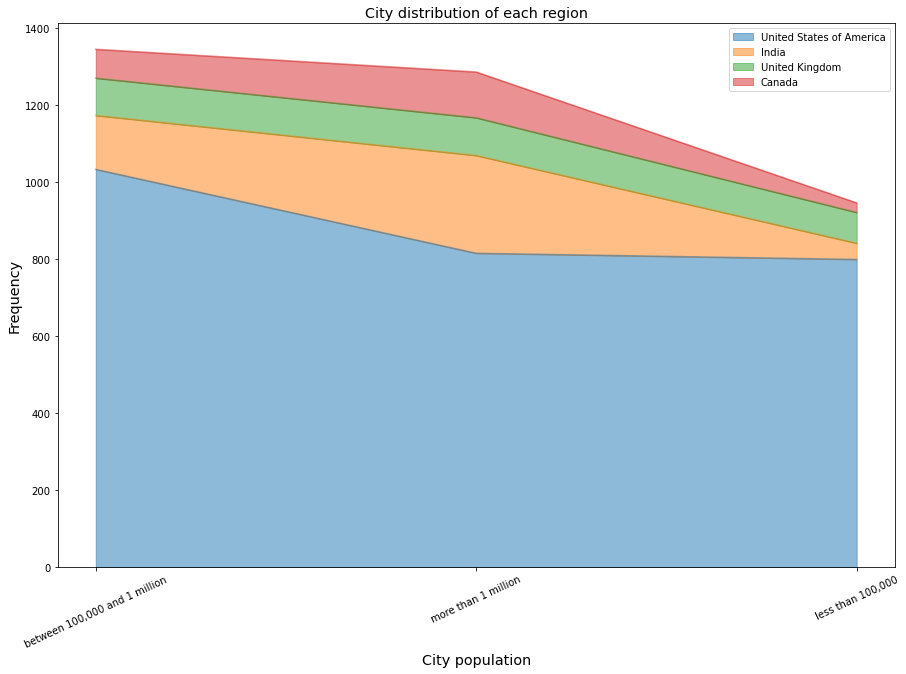

In [16]:
to_df = pd.DataFrame(data=[area_usa, area_india, area_uk, area_canada], 
                     index=['United States of America','India','United Kingdom', 'Canada'])

#Divide plot frame:
to_df.T.plot(kind='area', alpha=0.5, figsize=(15, 10))
plt.xticks(rotation=25, ticks=[0,1,2])
plt.xlabel('City population', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')

plt.title('City distribution of each region', fontsize='x-large')
plt.show()

By the city population of each region, we can see:
- The customer mainly gathering at `USA`, and at the city that population is `between 100,000 and 1 million` => We will concetrate in `USA` to find the chance for our product.
- The remains region have the same pattern: the customer gathering at the place that `between 100,000 and 1 million`, and `more than 1 million`; but `Canada` and `UK` have less customer than `India` & `USA` so we will note `Canada` and `UK` result as reference.

# 3. Customer's learning fee at each regions

The second indicator that one market will be considered to be potential is __how much money they willing to pay for e-learning course__, we couldn't be promote our product in place that customers want it for free.

Our product have offered in __59USD/month__, so we want to know the current status of _learning fee by months_ of each regions.

Note: On this state, because we only focus on who have result in field _learning fee by months_, so we will remove all of records that missing value at this field.

In [17]:
# Replace value in `MonthsProgramming` (to divide later)
survey17_3['MonthsProgramming'].unique()

array([  6.,   5.,  12.,  nan,   9.,   1.,  14.,  28.,   2.,   3.,  25.,
         8.,  60.,  18.,  19.,  24.,  20.,   4.,  36.,   0.,  48.,  16.,
        26.,  11.,  30.,  29.,  15.,  72.,   7.,  13.,  17.,  10.,  84.,
       240.,  40.,  42.,  50.,  34.,  55.,  59.,  70.,  49.,  21.,  96.,
        45.,  32., 108.,  43.,  33.,  52.,  41.,  54.,  23., 200.,  27.,
       180.,  39., 100., 113., 144.,  73.,  83., 360., 190.,  38.,  35.,
        80., 156., 744., 120., 198.,  58.,  44., 111.,  22., 408., 480.,
       300.,  89.])

In [18]:
def return_0(num):
    if num==0:
        return 1
    return num

survey17_3.loc[:,'MonthsProgramming'] = survey17_3['MonthsProgramming'].apply(return_0)
survey17_3['MonthsProgramming'].unique()

array([  6.,   5.,  12.,  nan,   9.,   1.,  14.,  28.,   2.,   3.,  25.,
         8.,  60.,  18.,  19.,  24.,  20.,   4.,  36.,  48.,  16.,  26.,
        11.,  30.,  29.,  15.,  72.,   7.,  13.,  17.,  10.,  84., 240.,
        40.,  42.,  50.,  34.,  55.,  59.,  70.,  49.,  21.,  96.,  45.,
        32., 108.,  43.,  33.,  52.,  41.,  54.,  23., 200.,  27., 180.,
        39., 100., 113., 144.,  73.,  83., 360., 190.,  38.,  35.,  80.,
       156., 744., 120., 198.,  58.,  44., 111.,  22., 408., 480., 300.,
        89.])

In [19]:
#Caculate learning fee per months:
survey17_3.loc[:,'fee_months'] = survey17_3['MoneyForLearning']/survey17_3['MonthsProgramming']

#Filter all records missing value at new field:
survey17_3 = survey17_3[lambda x:x['fee_months'].notnull()]
survey17_3.isnull().sum()

Age                      30
AttendedBootcamp         13
BootcampFinish         3117
BootcampLoanYesNo      3115
BootcampName           3133
                       ... 
Part1StartTime            0
Part2EndTime              0
Part2StartTime            0
YouTubeTheNewBoston    2777
fee_months                0
Length: 65, dtype: int64

<AxesSubplot:xlabel='CountryLive', ylabel='fee_months'>

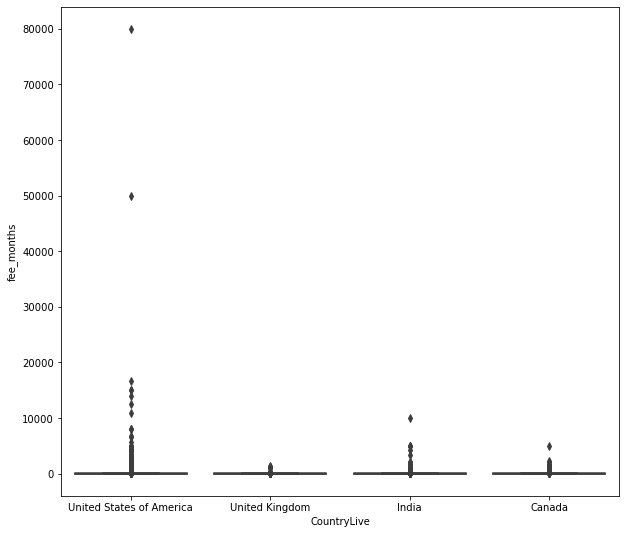

In [20]:
#Plot:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='CountryLive', y='fee_months', data=survey17_3)

We're likely to dealing with extremely outlier (ex: `USA` with _learning fee per months_ up to 80000 USD), now we will filter all records that have `fee_months` over 50000USD.

In [21]:
#Filter 1st:
survey17_3[lambda x:x['fee_months']>50000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,30000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,20.0,11d884a40e5662ef57566556206b7754,4f77cc788154cb155fb513ece8ea40da,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,work for a nonprofit,0.0,"Back-End Web Developer, Front-End Web Develo...",in an office with other developers,English,"single, never married",80000.0,1.0,b01f8f18a7,2017-03-16 23:14:34,2017-03-16 23:09:32,2017-03-16 23:16:45,2017-03-16 23:14:39,NaN,80000.0


For this station, the `MonthsProgramming` just 1 months, but the `MoneyForLearning` is over 50000USD, it could be mismatch when answer the survey (note that this is online programming course, and over 20000USD is likely to be in university, and the original question is :`Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?`) => We decide to delete this records.

In addition, we will check for all the `MonthsProgramming` period, to see how long everone spent to learn.

In [22]:
survey17_3 = survey17_3[lambda x:x['fee_months']<50000]

<AxesSubplot:>

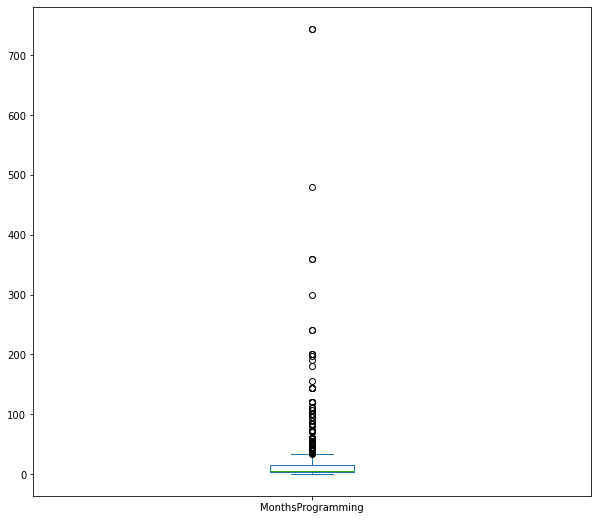

In [23]:
#Plot the leaning period
survey17_3['MonthsProgramming'].plot(kind='box', figsize=(10,9))

We have some observe about the `MonthsProgramming`:
- First, we will use __3-step standard deviatation__ for get rid all of values that likely to be typical error, or the fact that as one get used for code in long way, he/she doesn't likely to be attend any bootcamp or programming course (ex: >5 year)
- Second, we'll check for those who only have 1 months for programming (to see any odd things happend)

<AxesSubplot:>

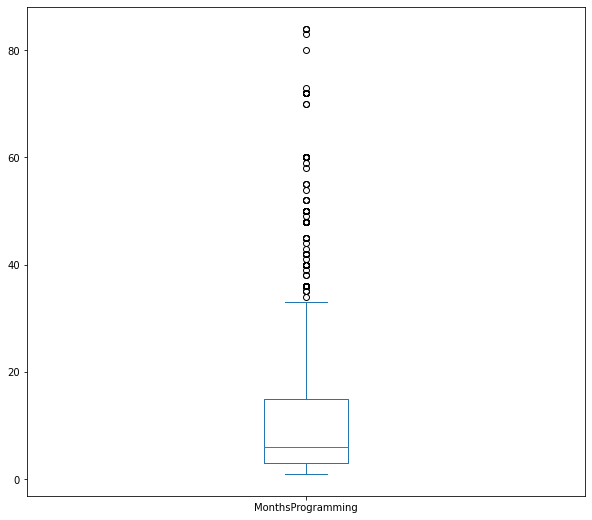

In [24]:
#Caculate z-score :
std = survey17_3['MonthsProgramming'].std(ddof=1)

#Filter:
survey17_3 = survey17_3[lambda x:x['MonthsProgramming']<(3*std)]

#Check the result:
survey17_3['MonthsProgramming'].plot(kind='box', figsize=(10,9))

In [25]:
#Check for person only get 1 months programming:
survey17_3[lambda x:(x['MonthsProgramming']==1)&(x['AttendedBootcamp']!=0)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
534,26.0,1.0,0.0,0.0,Geekwise Academy,1.0,NaN,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,50000.0,NaN,NaN,genderqueer,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,20.0,ca7d1eafa05eb0e19049602a3148cb21,7b8e0544d004120247b8c75229739d5d,40000.0,1.0,0.0,0.0,1.0,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,work for a medium-sized company,1.0,"Full-Stack Web Developer, Mobile Developer, ...",in an office with other developers,Tagalog,"single, never married",250.0,1.0,c8cfa24202,2017-03-09 19:21:57,2017-03-09 19:04:07,2017-03-09 19:28:10,2017-03-09 19:22:00,NaN,250.0
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,8000.0
5172,31.0,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",15 to 29 minutes,United States of America,United States of America,NaN,Customer Service,Employed for wages,NaN,40000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,10.0,31851dec4197756ac3f3797a80943d08,e48b25ed49b47f1980cdbff5f58b9879,25000.0,0.0,0.0,0.0,0.0,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a startup,NaN,Mobile Developer,from home,English,married or domestic partnership,0.0,1.0,b35be1db8d,2017-03-16 02:44:46,2017-03-16 02:42:38,2017-03-16 02:46:54,2017-03-16 02:44:50,NaN,0.0
5445,19.0,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,40000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,1.0,f10d4be99fa7d4707f3e006539ce61d5,51916d2a87535a81c4518cbb829c6a50,NaN,1.0,0.0,0.0,NaN,more than 12 months from now,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, User Experience D...",in an office with other developers,Spanish,"single, never married",0.0,1.0,441746006f,2017-03-16 22:13:47,2017-03-16 22:11:07,2017-03-16 22:15:15,2017-03-16 22:13:52,NaN,0.0
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,70000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,45.0,69096aacf4245694303cf8f7ce68a63f,4c56f82a348836e76dd90d18a3d5ed88,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,1.0

We observed some of records that: the attendance said `AttendedBootCamp` is `yes` but have not done that, and their `MonthsProgramming` only 1 months => We will delete all this records because they're not likely to be join our course (since [there's so many bootcamp with a fixed period have learning fee over 8000USD](https://www.neiu.edu/academics/our-centers-and-programs/community-and-professional-education/online-non-credit/technology-and-bootcamps/program-costs-technology-and-bootcamps); and of course; do they have time to join our e-learning course while they've attended full time at other bootcamp?)

In [26]:
#Create a filter condition
con1 = survey17_3['MonthsProgramming']==1
con2 = survey17_3['AttendedBootcamp']!=0
con3 = survey17_3['BootcampFinish']==0

combine = con1&con2&con3

#Filter the dataset:
survey17_3 = survey17_3[~combine]
survey17_3.shape

(3315, 65)

Now we've done to filter `MonthsProgramming`, we will come back to see any change for the money spent above.

<AxesSubplot:xlabel='CountryLive', ylabel='fee_months'>

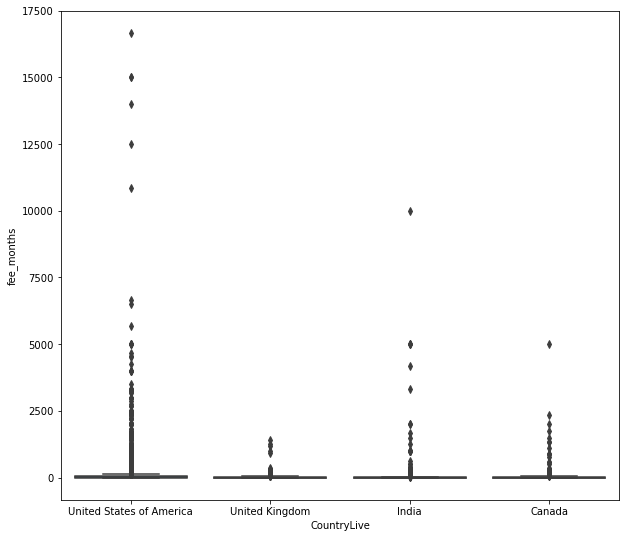

In [27]:
#Plot:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='CountryLive', y='fee_months', data=survey17_3)

We continue to check on records that said have spent over 17500USD for learning.

In [28]:
#check for those spent 17500USD for learning code
over_17500 = survey17_3[lambda x:x['fee_months']>10000]
over_17500

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,50.0,e1d790033545934fbe5bb5b60e368cd9,7cf1e41682462c42ce48029abf77d43c,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,"DevOps / SysAdmin, Front-End Web Developer...",no preference,English,married or domestic partnership,65000.0,6.0,75759e5a1c,2017-03-13 10:06:46,2017-03-13 09:56:13,2017-03-13 10:10:00,2017-03-13 10:06:50,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,70000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,45.0,69096aacf4245694303cf8f7ce68a63f,4c56f82a348836e76dd90d18a3d5ed88,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Game Developer, Pr...",no preference,English,married or domestic partnership,15000.0,1.0,53d13b58e9,2017-03-21 20:13:08,2017-03-21 20:10:25,2017-03-21 20:14:36,2017-03-21 20:13:11,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,15 to 29 minutes,United States of America,United States of America,education,NaN,Employed for wages,NaN,55000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,4.0,cb2754165344e6be79da8a4c76bf3917,272219fbd28a3a7562cb1d778e482e1e,NaN,1.0,0.0,0.0,0.0,I'm already applying,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,0.0,"Full-Stack Web Developer, Back-End Web Developer",no preference,Spanish,"single, never married",70000.0,5.0,439a4adaf6,2017-03-23 01:37:46,2017-03-23 01:35:01,2017-03-23 01:39:37,2017-03-23 01:37:49,NaN,14000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,NaN,1.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,400000.0,40.0,e1925d408c973b91cf3e9a9285238796,7e9e3c31a3dc2cafe3a09269398c4de8,NaN,1.0,1.0,0.0,NaN,I'm already applying,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Product Manager, Data Engineer, Full-Stack W...",in an office with other developers,English,married or domestic partnership,200000.0,12.0,1a45f4a3ef,2017-03-14 02:42:57,2017-03-14 02:40:10,2017-03-14 02:45:55,2017-03-14 02:43:05,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,health care,NaN,Employed for wages,NaN,60000.0,0.0,NaN,female,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,12.0,624914ce07c296c866c9e16a14dc01c7,6384a1e576caf4b6b9339fe496a51f1f,40000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work

Temporality, we don't have any prove to filter more, so we will group this dataset by `Country` and caculate the average `fee_months` for each country. 

In [29]:
#Group by and calculate the average
group_1 = survey17_3.groupby('CountryLive')
avg_fee = group_1['fee_months'].agg(np.mean)

df_c = pd.DataFrame(data=avg_fee)
df_c

,fee_months
CountryLive,
Canada,129.810406
India,146.663700
United Kingdom,49.924924
United States of America,192.961865


Look at the learning fee average result, we saw the odd things when customer in `UK` spent less money to learn than `India`, even `Canada`.

Check with the finance metric: [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies), it's the natural thing that _GDP per capita_ of `Canada` and `UK` greater than `India`. So now, let's check for only `India` whether if any records is abnormal.

In [30]:
#Check for only India:
survey17_3[lambda x:(x['fee_months']>2500)&(x['CountryLive']=='India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,India,India,NaN,NaN,Not working but looking for work,NaN,80000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,80.0,69e8ab9126baee49f66e3577aea7fd3c,9f08092e82f709e63847ba88841247c0,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,"Back-End Web Developer, Full-Stack Web Develop...",in an office with other developers,Malayalam,"single, never married",5000.0,1.0,0d3d1762a4,2017-03-27 07:10:17,2017-03-27 07:05:23,2017-03-27 07:12:21,2017-03-27 07:10:22,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,India,India,NaN,NaN,Unable to work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,30.0,b7fe7bc4edefc3a60eb48f977e4426e3,80ff09859ac475b70ac19b7b7369e953,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,Mobile Developer,no preference,Hindi,"single, never married",20000.0,2.0,51a6f9a1a7,2017-04-01 00:31:25,2017-04-01 00:28:17,2017-04-01 00:33:44,2017-04-01 00:31:3

We should take for a second and look at 2 people at `India` who were __only 1 months__ for programming learning but spent up to `5000USD`, and, their `JobRoleInterest` was:`User Experience Designer, Back-End Deverloper,...`/ `Back-end Web Deverloper, Full-stack Deverloper...`.

What we want to mention here is: How can they are newbie to learn programming (starter level) but they spent up to 5000USD, and have interest for a number of `JobRoleInterest`? Are they only want to try for what's fit them among of many selection? How can we know if they feel their current selection ae not right and left it all out?

And we have one records, someone `19 years old` but state with `Unable to work` and spent `20000USD` while he was only 2 months programming. While we can't check his information is true or not, it's sound like an error.

Now we will check for all records that state `MonthProgramming` less than 2 months

In [31]:
#Filter the dataset
entry_level = survey17_3[lambda x:x['MonthsProgramming']==1].copy()

#Idea: we will split all those who interesting above 2 job to an group, and remain to an group
#Check for the fee_months they spent, and decide keep which records, delete which records by its distribution
def split_str(str_):
    div = str_.split(',')
    if len(div) > 1:
        return 0
    return div[0]

entry_level.loc[:,'job_role'] = entry_level['JobRoleInterest'].apply(split_str)
entry_level

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months,job_role
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",30 to 44 minutes,United States of America,United States of America,sales,NaN,Employed for wages,NaN,40000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,cfff58e11d5ab123bd574302ff1b8e8f,044f4310564b902b19f1e2d776b988d6,20000.0,0.0,0.0,0.0,1.0,more than 12 months from now,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",0.0,1.0,4b5d882f3a,2017-03-09 00:55:36,2017-03-09 00:47:48,2017-03-09 00:57:31,2017-03-09 00:55:39,NaN,0.0,Full-Stack Web Developer
31,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,15 to 29 minutes,United States of America,United States of America,education,NaN,Employed for wages,NaN,65000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,12.0,b8f8bf53584f741aaf0ec75b64ea9258,c482f180a233c2fd0918dc3b1cd3e925,40000.0,1.0,0.0,0.0,0.0,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,NaN,Front-End Web Developer,from home,English,"single, never married",0.0,1.0,6485440344,2017-03-09 01:29:45,2017-03-09 01:27:20,2017-03-09 01:31:56,2017-03-09 01:29:49,NaN,0.0,Front-End Web Developer
222,39.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,30 to 44 minutes,United Kingdom,United Kingdom,food and beverage,NaN,Employed for wages,NaN,40000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,1.0,NaN,NaN,15.0,86a48312c14b0f94c06a0cc21ed6fe0f,9c6856ed82aff35d88647fc9fc22b2ca,30000.0,1.0,0.0,0.0,1.0,Within 7 to 12 months,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,0.0,"Data Engineer, Data Scientist, Back-End Web ...",in an office with other developers,Japanese,married or domestic partnership,35.0,1.0,5ef23ceac4,2017-03-09 12:32:27,2017-03-09 12:25:44,2017-03-09 12:36:46,2017-03-09 12:32:32,NaN,35.0,0
227,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,30 to 44 minutes,United Kingdom,United Kingdom,office and administrative support,NaN,Employed for wages,NaN,NaN,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,150000.0,30.0,573df57689bc53472d08c36d28c36715,657c94f2a486e1cdef202235a600da76,26750.0,1.0,0.0,0.0,1.0,Within 7 to 12 months,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,work for a medium-sized company,1.0,"DevOps / SysAdmin, Data Scientist, Quali...",in an office with other developers,English,"single, never married",50.0,1.0,891c6a9305,2017-03-09 12:42:45,2017-03-09 12:40:37,2017-03-09 12:45:33,2017-03-09 12:42:48,NaN,50.0,0
234,25.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",30 to 44 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,90000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,15.0,a92d73cb41305dfdc9e148d4c4a3042a,d7509af14eb38671e6c403811939ff15,63000.0,0.0,0.0,0.0,0.0,more than 12 months from now,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a medium-sized compa

In [32]:
entry_level[lambda x:x['job_role']!=0]['fee_months'].value_counts()

0.0       80
50.0       4
1000.0     4
100.0      4
20.0       3
10.0       3
500.0      3
400.0      3
45.0       3
1200.0     2
25.0       2
30.0       2
150.0      1
4000.0     1
2000.0     1
90.0       1
370.0      1
40.0       1
70.0       1
750.0      1
65.0       1
35.0       1
300.0      1
Name: fee_months, dtype: int64

In [33]:
entry_level[lambda x:x['job_role']==0]['fee_months'].value_counts()

0.0        259
100.0       14
50.0        12
20.0        10
500.0        7
200.0        7
30.0         6
60.0         4
400.0        4
300.0        4
70.0         3
5000.0       3
1000.0       3
10.0         3
2000.0       3
250.0        2
35.0         2
15.0         2
1200.0       2
15000.0      1
800.0        1
170.0        1
12500.0      1
3000.0       1
71.0         1
2.0          1
130.0        1
25.0         1
24.0         1
230.0        1
80.0         1
594.0        1
45.0         1
180.0        1
198.0        1
2500.0       1
4000.0       1
110.0        1
Name: fee_months, dtype: int64

In [34]:
#Filter by MonthsProgramming and fee_months:
con4 = survey17_3['MonthsProgramming']==1
con5 = survey17_3['fee_months']>5000

combine2 = con4&con5

survey17_3 = survey17_3[~combine2]
survey17_3.shape

(3313, 65)

Next, we continue to check for those got 2 months in programming, to see have any odd `fee_months` here

<AxesSubplot:ylabel='Frequency'>

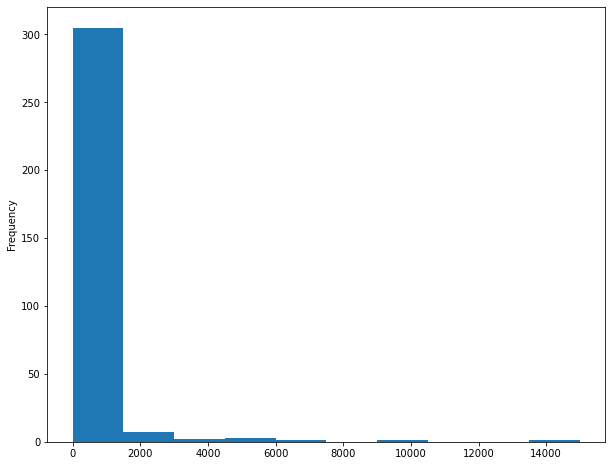

In [35]:
#Check for those who reached 2 months;
survey17_3[lambda x:x['MonthsProgramming']==2]['fee_months'].plot(kind='hist', figsize=(10,8))

We will apply the condition same as when flter records in `MonthsProgramming` is `1 months`

In [36]:
#Filter the records for those in 2months programming:
con6 = survey17_3['MonthsProgramming']==2
con7 = survey17_3['fee_months']>5000

combine3 = con6&con7

survey17_3 = survey17_3[~combine3]
survey17_3.shape

(3310, 65)

Now, we will come back to our `fee_months` boxplot graph and see do we have the useable data.

<AxesSubplot:xlabel='CountryLive', ylabel='fee_months'>

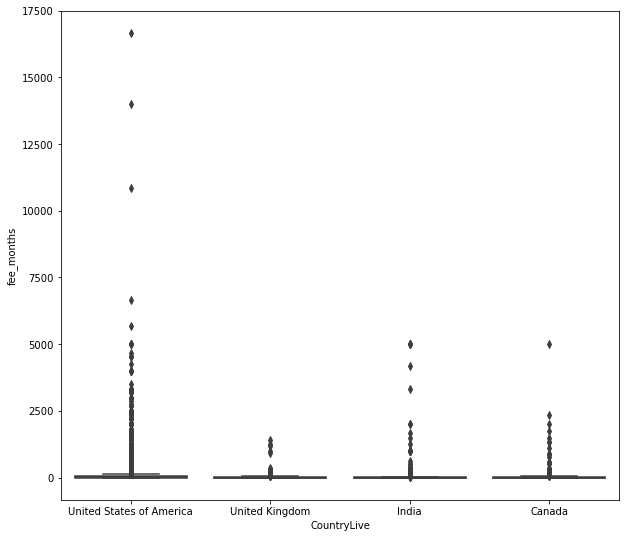

In [37]:
#Plot:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='CountryLive', y='fee_months', data=survey17_3)

In [38]:
#Group by and calculate the average
group_2 = survey17_3.groupby('CountryLive')
avg_fee2 = group_2['fee_months'].agg(np.mean)

df_c1 = pd.DataFrame(data=avg_fee2)
df_c1

,fee_months
CountryLive,
Canada,129.810406
India,121.527638
United Kingdom,49.924924
United States of America,173.459983


Before ending this task, we will check again for `Canada` and see if we can delete any records.

In [39]:
#Tabular of `UK`
survey17_3[lambda x:(x['CountryLive']=='Canada')&(x['fee_months']>4000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,5000.0


We can keep all the records in `Canada` which less than 5000USD, because in the case above, the coder hasn't end his bootcamp yet, and not likely to join our product. But for comfortable, we will delete all those who marked `AttendedBootcamp` is Yes but hasn't yet their schedule

In [40]:
#Filter:
con8 = survey17_3['AttendedBootcamp']==1
con9 = survey17_3['BootcampFinish']==0

combine4 = con8&con9

survey17_3 = survey17_3[~combine4]
survey17_3.shape

(3204, 65)

<AxesSubplot:xlabel='CountryLive', ylabel='fee_months'>

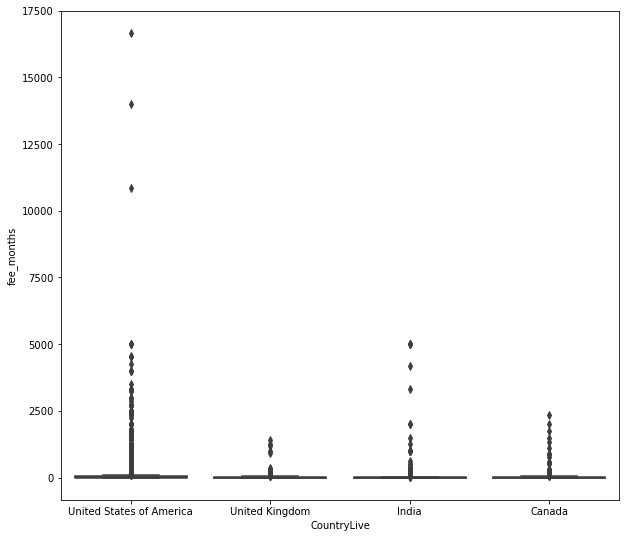

In [41]:
#Check boxplot:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='CountryLive', y='fee_months', data=survey17_3)

In [42]:
survey17_3[lambda x:(x['CountryLive']=='India')&(x['fee_months']>2500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,YouTubeTheNewBoston,fee_months
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,India,India,NaN,NaN,Not working but looking for work,NaN,80000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,80.0,69e8ab9126baee49f66e3577aea7fd3c,9f08092e82f709e63847ba88841247c0,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,"Back-End Web Developer, Full-Stack Web Develop...",in an office with other developers,Malayalam,"single, never married",5000.0,1.0,0d3d1762a4,2017-03-27 07:10:17,2017-03-27 07:05:23,2017-03-27 07:12:21,2017-03-27 07:10:22,1.0,5000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,65000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,36.0,5a7394f24292cb82b72adb702886543a,8bc7997217d4a57b22242471cc8d89ef,60000.0,0.0,0.0,0.0,1.0,I haven't decided,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,NaN,"Full-Stack Web Developer, Data Scientist",from home,Hindi,"single, never married",100000.0,24.0,8af0c2b6da,2017-04-03 09:43:53,2017-04-

In [43]:
survey17_3 = survey17_3.drop(index=[7989, 8126])

<AxesSubplot:xlabel='CountryLive', ylabel='fee_months'>

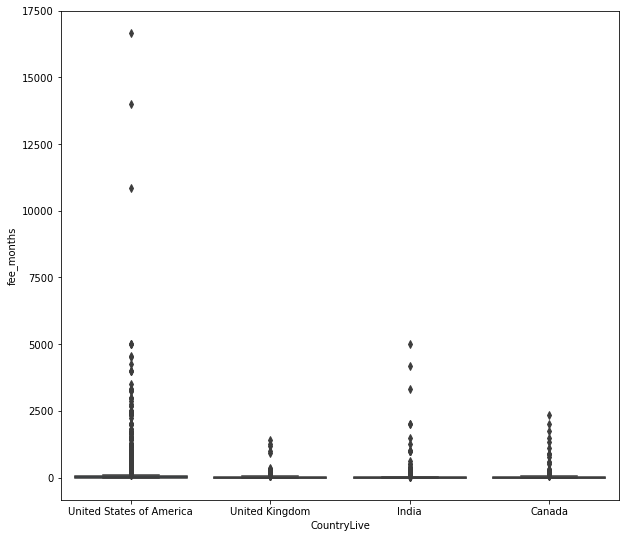

In [44]:
#Check boxplot:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='CountryLive', y='fee_months', data=survey17_3)

In [45]:
#Group by and calculate the average
group_3 = survey17_3.groupby('CountryLive')
avg_fee3 = group_3['fee_months'].agg(np.mean)

df_c2 = pd.DataFrame(data=avg_fee3)
df_c2

,fee_months
CountryLive,
Canada,98.057129
India,93.172929
United Kingdom,50.281608
United States of America,141.386442


Look at the final tabular result, we can see that our potential market definily is `USA` with __141USD/months__ they're willing to spend. It's because:
- 1. We have approximately __48% coder__ in survey interested to `Web/ Mobile Deverloper` among all attendance region, and it's the greatest
- 2. Their income also good too, now we will take a look at thier income distribution to check.

25% USA's income is 24000.0 USD
75% USA's income is 55000.0 USD
Average income at USA is 42107.62146050671 USD


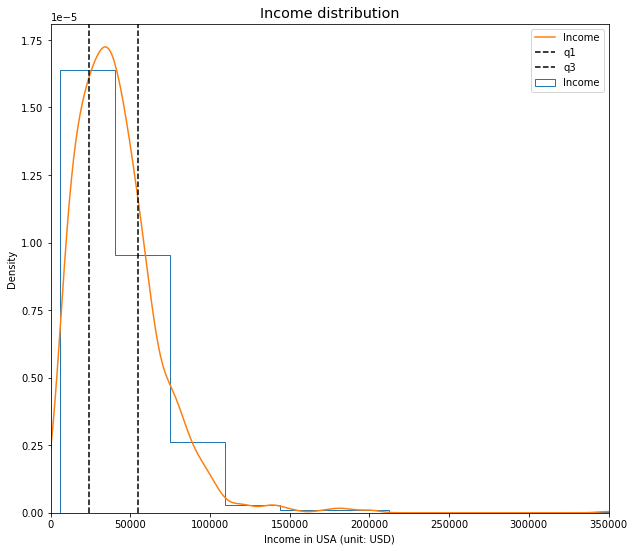

In [46]:
#Plot:
usa = survey17_3[lambda x:(x['CountryLive']=='United States of America')&(x['Income'].notnull())]['Income']
q1, q3 = np.quantile(usa, [.25, .75])

print("25% USA's income is {} USD".format(q1))
print("75% USA's income is {} USD".format(q3))
print("Average income at USA is {} USD".format(usa.mean()))

#Plot histogram bar:
usa.plot.hist(histtype='step', density='True')
usa.plot.kde(legend=True)
plt.axvline(q1, ls='dashed', color='black', label='q1')
plt.axvline(q3, ls='dashed', color='black', label='q3')

plt.xlim([0, usa.max()])

plt.gcf().set_size_inches(10,9)
plt.xlabel('Income in USA (unit: USD)')
plt.ylabel('Density')

plt.title('Income distribution', fontsize='x-large')
plt.legend()
plt.show()

The income distribution of `USA` is for reference, but it's a good income, and of course it's `USA`.

Back to the question, now we have already picked one market: `USA` .

The two remain market: `Canada` and `India`. The learning fee of `India`'s customer spent for learning programming isn't great less than `Canada`'s customer (98USD of `Canada` vs 93USD of `India`) but the potential customer's area in `India` is quite better than `Canada` (8% `India` > 4% `Canada`)

Look at the result we have, we can temporality choose `India` as the second market, but for the accuracy, we will send all this result to __Market's team__ and co-operate with them too see whether `India` the second potential market that we're looking for.

# Conclusion:
1. USA is the first potential market, for __the average learning fee per months: 141USD__ and __48% coder__ among all attendance regions is interesting in `Web/ Mobile Deverloper`, which is our main source.
2. The second market is temporality `India` due to __8% coder__ among all attendance regions interest with `Web/ Mobile Deverloper`, and they are willing to spent __93USD / months__ to do it.
3. The other candidate for the second potential market is `Canada` with __4% coder__ interest in `Web/ Mobile Deverloper` and they willing to spent __98USD / months__ to do it. So, we will send this result to __Market's team__ to get the exactly result for the second market.